Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal", "Fraud"]

In [3]:
dataset = pd.read_csv("creditcard.csv")
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


Check for any null values

In [4]:
print("Any nulls in the dataset ", dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ", dataset.Class.unique())

Any nulls in the dataset  True
-------
No. of unique labels  3
Label values  [ 0.  1. nan]


0 is for normal credit card transaction, 1 is for fraudulent credit card transaction

In [5]:
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

-------
Break down of the Normal and Fraud Transactions
0.0    3970
1.0       2
Name: Class, dtype: int64


Visualizing the imbalanced dataset

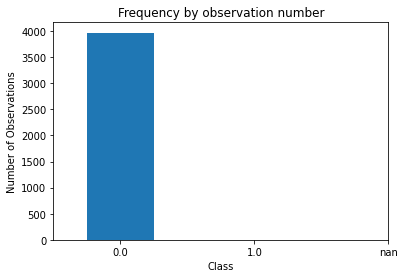

In [6]:
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

Save the normal and fradulent transactions in separate dataframe

In [7]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

Visualize transactionamounts for normal and fraudulent transactions

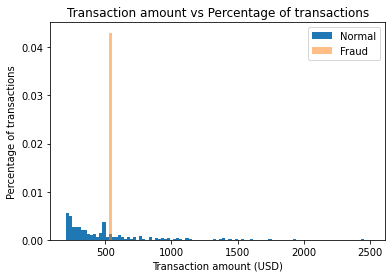

In [8]:
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins = bins, alpha = 1, density = True, label = 'Normal')
plt.hist(fraud_dataset.Amount, bins = bins, alpha = 0.5, density = True, label = 'Fraud')
plt.legend(loc = 'upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

Time and Amount are the columns that are not scaled, so applying Standar
dScaler to only Amount and Time columns.
Normalizing the values between 0 and 1 did not work great for the dataset.

In [9]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

The last column in the dataset is our target variable.

In [10]:
raw_data = dataset.values

The last element contains if the transaction is normal which is represente
d by a 0 and if fraud then 1

In [11]:
labels = raw_data[:, -1]

The other data points are the electrocadriogram data

In [12]:
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 2021)

Normalize the data to have a value between 0 and 1.

In [13]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Normal data has a value of 0 in the target variable. Using the target variab
le to create a normal and fraud dataset.

In [14]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data = ", len(fraud_train_data))
print(" No. of records in Normal Train data = ", len(normal_train_data))
print(" No. of records in Fraud Test Data = ", len(fraud_test_data))
print(" No. of records in Normal Test data = ", len(normal_test_data))

 No. of records in Fraud Train Data =  2
 No. of records in Normal Train data =  3176
 No. of records in Fraud Test Data =  1
 No. of records in Normal Test data =  794


In [15]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1] 
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2 = 4
learning_rate = 1e-7

Input layer

In [16]:
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

Encoder

In [17]:
encoder = tf.keras.layers.Dense(encoding_dim, activation = "tanh", activity_regularizer = tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation = 'relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation = tf.nn.leaky_relu)(encoder)

Decoder

In [18]:
decoder = tf.keras.layers.Dense(hidden_dim_1, activation = 'relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation = 'relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation = 'tanh')(decoder)

Autoencoder

In [19]:
autoencoder = tf.keras.Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

Define the callbacks for checkpoints and early stopping

In [20]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath = "autoencoder_fraud.h5", mode = 'min', 
    monitor = 'val_loss', verbose = 2, save_best_only = True)

Define our early stopping

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', min_delta = 0.0001, patience = 10, verbose = 1, mode = 'min', 
    restore_best_weights = True)

Compile the Autoencoder

In [22]:
autoencoder.compile(metrics = ['accuracy'], loss = 'mean_squared_error', optimizer = 'adam')

Train the Autoencoder

In [23]:
history = autoencoder.fit(
    normal_train_data, normal_train_data, epochs = nb_epoch, batch_size = batch_size, shuffle = True, 
    validation_data = (test_data, test_data), verbose = 1, callbacks = [cp, early_stop]
    ).history

Epoch 1/50
44/50 [=========================>....] - ETA: 0s - loss: 0.2624 - accuracy: 0.0018
Epoch 1: val_loss did not improve from inf
50/50 [==============================] - 1s 8ms/step - loss: 0.2514 - accuracy: 0.0016 - val_loss: nan - val_accuracy: 0.0013
Epoch 2/50
44/50 [=========================>....] - ETA: 0s - loss: 0.0822 - accuracy: 0.0092
Epoch 2: val_loss did not improve from inf
50/50 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.0094 - val_loss: nan - val_accuracy: 0.0013
Epoch 3/50
41/50 [=======================>......] - ETA: 0s - loss: 0.0275 - accuracy: 0.0263
Epoch 3: val_loss did not improve from inf
50/50 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.0293 - val_loss: nan - val_accuracy: 0.0616
Epoch 4/50
37/50 [=====================>........] - ETA: 0s - loss: 0.0142 - accuracy: 0.0515
Epoch 4: val_loss did not improve from inf
50/50 [==============================] - 0s 5ms/step - loss: 0.0138 - accu

Plot training and test loss

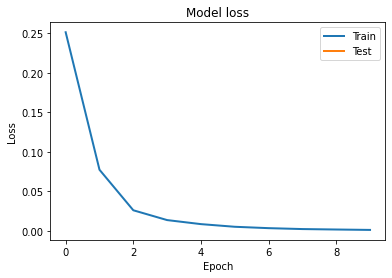

In [24]:
plt.plot(history['loss'], linewidth = 2, label = 'Train')
plt.plot(history['val_loss'], linewidth = 2, label = 'Test')
plt.legend(loc = 'upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin = 0.70, ymax = 1)
plt.show()

To calculate the reconstruction loss on test data,
predict the test data and calculate the mean square error between the test d
ata and the reconstructed test data.

In [25]:
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis = 1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_labels})

25/25 [==============================] - 0s 1ms/step


Plotting the test data points and their respective reconstruction error sets a threshold value to visualize if the threshold value needs to be adjusted.

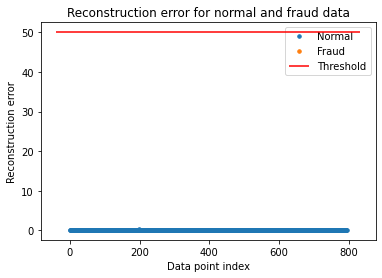

In [26]:
threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms = 3.5, linestyle = '',
  label = "Fraud" if name == 1 else "Normal")

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors = "r", zorder = 100, label = 'Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Detect anomalies as points where the reconstruction loss is greater than
a fixed threshold.
Here we see that a value of 52 for the threshold will be good. Evaluating the performance of the anomaly detection.

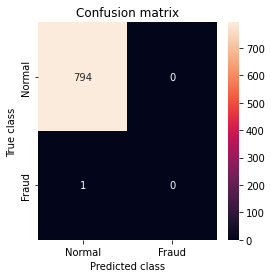

In [27]:
threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] = pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Print accuracy, precision and recall

In [28]:
print(" Accuracy: ", accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ", recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ", precision_score(error_df['True_class'], error_df['pred']))

 Accuracy:  0.9987421383647799
 Recall:  0.0
 Precision:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
